# Downside

In [4]:
import pandas as pd
import risk_ as rv
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [50]:
hfi = rv.get_hfi_returns()
hfi = hfi["2000":]
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01,0.0227,0.0128,0.0088,0.0077,0.0075,0.0088,0.0041,0.0021,0.0075,0.0143,0.0173,0.0427,0.0169
2000-02,0.0267,-0.0022,0.0421,0.0528,0.0253,0.0346,0.0097,0.0408,0.0699,0.0239,0.0185,-0.1340,0.0666
2000-03,0.0243,-0.0138,0.0103,0.0318,0.0134,0.0069,-0.0061,-0.0104,0.0006,0.0131,0.0163,-0.0230,0.0039
2000-04,0.0223,-0.0241,-0.0101,-0.0541,0.0168,-0.0059,-0.0006,-0.0304,-0.0201,0.0188,0.0092,0.1028,-0.0269
2000-05,0.0149,0.0114,-0.0132,-0.0433,0.0062,-0.0034,0.0107,-0.0070,-0.0097,0.0146,0.0080,0.0704,-0.0122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


# Semideviation

In [6]:
hfi.std(ddof=0)

Convertible Arbitrage     0.017112
CTA Global                0.023139
Distressed Securities     0.016362
Emerging Markets          0.027473
Equity Market Neutral     0.007889
Event Driven              0.015634
Fixed Income Arbitrage    0.010265
Global Macro              0.012415
Long/Short Equity         0.018930
Merger Arbitrage          0.008498
Relative Value            0.011478
Short Selling             0.042864
Funds Of Funds            0.013877
dtype: float64

In [7]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019887
CTA Global                0.012282
Distressed Securities     0.013279
Emerging Markets          0.021664
Equity Market Neutral     0.009651
Event Driven              0.013074
Fixed Income Arbitrage    0.015178
Global Macro              0.006290
Long/Short Equity         0.013640
Merger Arbitrage          0.006375
Relative Value            0.011994
Short Selling             0.024907
Funds Of Funds            0.011295
dtype: float64

In [8]:
rv.semideviation(hfi)

Convertible Arbitrage     0.019887
CTA Global                0.012282
Distressed Securities     0.013279
Emerging Markets          0.021664
Equity Market Neutral     0.009651
Event Driven              0.013074
Fixed Income Arbitrage    0.015178
Global Macro              0.006290
Long/Short Equity         0.013640
Merger Arbitrage          0.006375
Relative Value            0.011994
Short Selling             0.024907
Funds Of Funds            0.011295
dtype: float64

### VaR and CVaR
Value at risk

- Historical VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fischer VaR

In [9]:
import numpy as np

In [46]:
np.percentile(hfi, 1, axis=0)

array([-0.031674, -0.050938, -0.042642, -0.065496, -0.0198  , -0.03854 ,
       -0.030748, -0.022632, -0.04506 , -0.022654, -0.021788, -0.107684,
       -0.0272  ])

In [47]:
def var_historic(r, level=5):
    """
    VaR Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a series or dataframe")
    

In [58]:
var_historic(hfi, level=1)

Convertible Arbitrage    -0.031674
CTA Global               -0.050938
Distressed Securities    -0.042642
Emerging Markets         -0.065496
Equity Market Neutral    -0.019800
Event Driven             -0.038540
Fixed Income Arbitrage   -0.030748
Global Macro             -0.022632
Long/Short Equity        -0.045060
Merger Arbitrage         -0.022654
Relative Value           -0.021788
Short Selling            -0.107684
Funds Of Funds           -0.027200
dtype: float64

In [39]:
from scipy.stats import norm

In [40]:
z = norm.ppf(.01)

In [41]:
z

-2.3263478740408408

In [53]:
var_gaussian = -(hfi.mean() + z*hfi.std(ddof=0))
var_gaussian

Convertible Arbitrage     0.034845
CTA Global                0.050336
Distressed Securities     0.031430
Emerging Markets          0.058070
Equity Market Neutral     0.014772
Event Driven              0.030853
Fixed Income Arbitrage    0.019519
Global Macro              0.024619
Long/Short Equity         0.039420
Merger Arbitrage          0.015355
Relative Value            0.021605
Short Selling             0.102130
Funds Of Funds            0.029385
dtype: float64

In [57]:
rv.var_gaussian(hfi, level=1, modified=True)

Convertible Arbitrage     0.103666
CTA Global                0.046643
Distressed Securities     0.049669
Emerging Markets          0.086796
Equity Market Neutral     0.041432
Event Driven              0.045732
Fixed Income Arbitrage    0.066479
Global Macro              0.022786
Long/Short Equity         0.051381
Merger Arbitrage          0.021282
Relative Value            0.048985
Short Selling             0.098323
Funds Of Funds            0.048793
dtype: float64

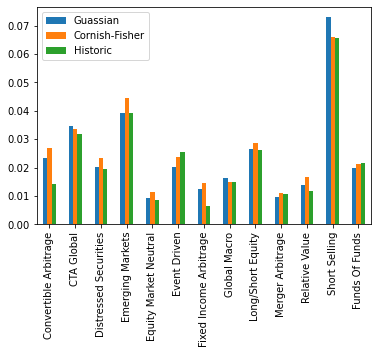

In [33]:
var_list = [rv.var_gaussian(hfi), rv.var_gaussian(hfi, modified=True), rv.var_historic(hfi)]
comparison=pd.concat(var_list, axis=1)
comparison.columns = ["Guassian", "Cornish-Fisher", "Historic"]
comparison.plot.bar()

### BeyondVar (CVaR)

In [34]:
rv.cvar_historic(hfi)

Convertible Arbitrage     0.037775
CTA Global                0.041250
Distressed Securities     0.033742
Emerging Markets          0.059842
Equity Market Neutral     0.018117
Event Driven              0.035225
Fixed Income Arbitrage    0.022500
Global Macro              0.019758
Long/Short Equity         0.042158
Merger Arbitrage          0.016925
Relative Value            0.024750
Short Selling             0.088275
Funds Of Funds            0.031900
dtype: float64

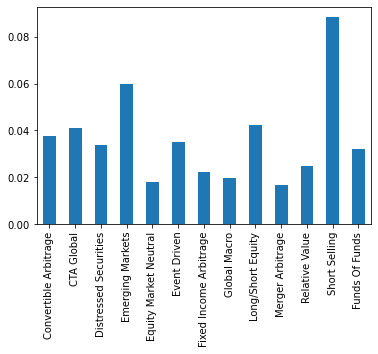

In [35]:
rv.cvar_historic(hfi).plot.bar()